In [1]:
import numpy as np
from control import *
import matplotlib.pyplot as plt
import sympy as sp
import scipy.signal as signal


## Question 6

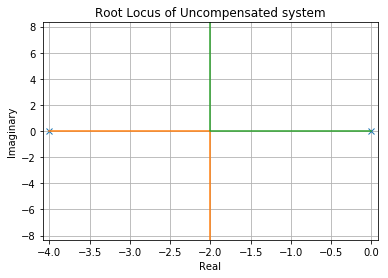

In [90]:
G=tf([16],[1,4,0])
root_locus(G)
plt.grid()
plt.title('Root Locus of Uncompensated system')
plt.show()

In [91]:
T=feedback(G,1)
T


      16
--------------
s^2 + 4 s + 16

In [92]:
Kv=20
K_=1/4
beta=Kv/K_
beta

80.0

In [93]:
sd=-2+2*np.sqrt(3)*1j

In [94]:
np.angle(evalfr(G,sd))*180/np.pi

-180.0

In [99]:
zg=0.1
pg=zg/beta
Gc=tf([1,zg],[1,pg])


In [100]:
zg,pg

(0.1, 0.00125)

In [101]:
np.angle(evalfr(Gc,sd))*180/np.pi

-1.2404826493339007

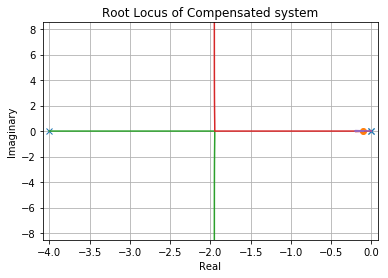

In [102]:
K=1/np.abs(evalfr(Gc*G,sd))
root_locus(K*G*Gc)
plt.grid()
plt.title('Root Locus of Compensated system')
plt.show()

In [103]:
K=1/np.abs(evalfr(Gc*G,sd))
K

1.0122567743542823

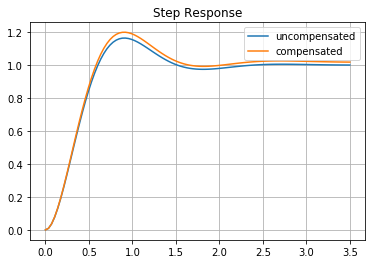

In [104]:
T=feedback(G,1)
Tc=feedback(K*G*Gc,1)
N,D=tfdata(Tc)
N=[N[0][0][i] for i in range(len(N[0][0]))]
D=[D[0][0][i] for i in range(len(D[0][0]))]
t=np.linspace(0,3.5,100)
t,y=step_response(T,t)
t,y1=step_response(Tc,t)
plt.plot(t,y,label='uncompensated')
plt.plot(t,y1,label='compensated')
plt.title('Step Response')
plt.grid()
plt.legend()
plt.show()

In [105]:
signal.residue(N,D)

(array([-0.00262429+0.j        ,  0.00131215-2.33826727j,
         0.00131215+2.33826727j]),
 array([-0.10249731+0.j        , -1.94937635+3.46430781j,
        -1.94937635-3.46430781j]),
 array([ 0.]))

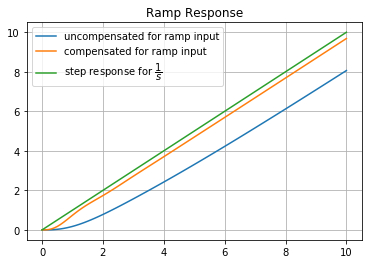

In [146]:
s=tf([1,0],[1])
t,y=step_response(T/s,t)
t,y1=step_response(Tc/s,t)
t,y2=step_response(1/s,t)
plt.plot(t,y,label='uncompensated for ramp input')
plt.plot(t,y1,label='compensated for ramp input')
plt.plot(t,y2,label='step response for $\dfrac{1}{s}$')
plt.title('Ramp Response')
plt.grid()
plt.legend()
plt.show()

## Question 4

In [139]:
G=tf([2,1],[1,3,2,0])
Ts=3
OS=0.3

In [140]:
def eval_zeta(OS):
    return 1/(np.sqrt(1+((np.pi)/np.log(OS))**2))

def eval_wn(Ts,OS):
    return 4/(eval_zeta(OS)*Ts)

def eval_poles(wn,zeta):
    return -zeta*wn+wn*(np.sqrt(1-zeta**2))*1j

def get_settling_time(y,t):
    rev=y[::-1]
    for i in range(len(rev)):
        if np.abs(rev[i]-1)>0.02:
            print('Settling Time is %f'%t[len(y)-i])
            break
def get_OS(y):
    max_val=np.max(y)
    OS=(max_val-1)*100
    print('Percentage Overshoot is %f '%OS)

zeta=eval_zeta(OS)
wn=eval_wn(Ts,OS)
sd=eval_poles(wn,zeta)

In [141]:
np.angle(evalfr(G,sd))*180/np.pi

177.8758979638931

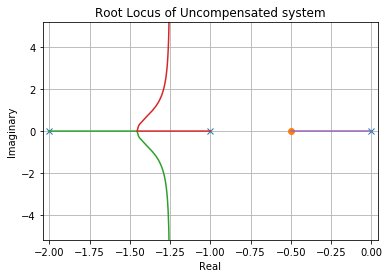

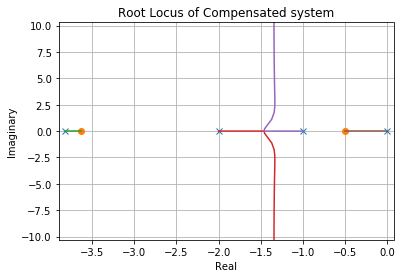

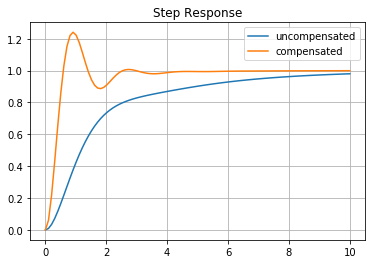

Settling Time is 2.424242
Percentage Overshoot is 24.080751 


In [142]:
phi=180-np.angle(evalfr(G,sd))*(180/np.pi)  # Angle deficiency to be contributed by the lead compensator    
theta=180-np.angle(sd)*(180/np.pi) 
gamma=0.5*(180-phi-theta)      
fac=1
zc=wn*(np.sin(gamma*np.pi/180))/(np.sin((theta+gamma)*np.pi/180))/fac
pc=(wn*np.sin((gamma+phi)*(np.pi/180)))/(np.sin((gamma+theta+phi)*(np.pi/180)))/fac
Gc=tf([1,zc],[1,pc])
K=1/abs(evalfr(Gc*G,sd));             # Gain of the Lead compensator 

T=feedback(G,1);                      # Closed loop transfer function of the uncompensated system
Tc=feedback(K*Gc*G,1);                # Closed loop transfer function of the compensated system

root_locus(G)                       # Rootlocus plots for uncompensated and compensated systems
plt.title('Root Locus of Uncompensated system')
plt.grid()      
plt.show()

root_locus(G*Gc)                       # Rootlocus plots for uncompensated and compensated systems
plt.title('Root Locus of Compensated system')
plt.grid()      
plt.show()

t=np.linspace(0,10,100)
t,y=step_response(T,t)                # Step responses of the uncompensated and compensated systems
t,y1=step_response(Tc,t)
plt.plot(t,y,label='uncompensated')
plt.plot(t,y1,label='compensated')
plt.title('Step Response')
plt.grid()
plt.legend()
plt.show()

get_settling_time(y1,t)
get_OS(y1)

In [143]:
N,D=tfdata(Tc)
N=[N[0][0][i] for i in range(len(N[0][0]))]
D=[D[0][0][i] for i in range(len(D[0][0]))]
signal.residue(N,D)

(array([ 0.03091976+0.j        , -0.04004500+0.j        ,
         0.00456262-1.88358441j,  0.00456262+1.88358441j]),
 array([-0.46944875+0.j        , -3.68599231+0.j        ,
        -1.33333333+3.47914022j, -1.33333333-3.47914022j]),
 array([ 0.]))

## Question 2

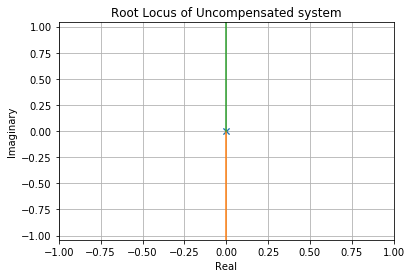

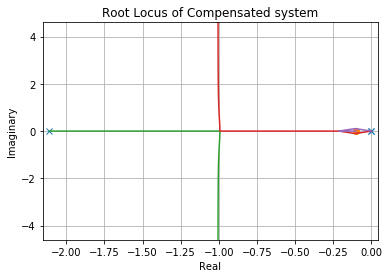

In [134]:
sd=-1+1j
G=tf([1],[1,0,0])
np.angle(evalfr(G,sd))*180/np.pi
wn=np.sqrt(2)
zeta=1/wn
phi=180-np.angle(evalfr(G,sd))*(180/np.pi)  # Angle deficiency to be contributed by the lead compensator    
theta=180-np.angle(sd)*(180/np.pi) 
zc=0.1
gamma=180-np.angle(sd+zc)*180/np.pi-theta   
#zc=wn*(np.sin(gamma*np.pi/180))/(np.sin((theta+gamma)*np.pi/180))
pc=(wn*np.sin((gamma+phi)*(np.pi/180)))/(np.sin((gamma+theta+phi)*(np.pi/180)))
Gc=tf([1,zc],[1,pc])
K=1/abs(evalfr(Gc*G,sd));             # Gain of the Lead compensator 

T=feedback(G,1);                      # Closed loop transfer function of the uncompensated system
Tc=feedback(K*Gc*G,1);                # Closed loop transfer function of the compensated system

root_locus(G)                       # Rootlocus plots for uncompensated and compensated systems
plt.title('Root Locus of Uncompensated system')
plt.grid()      
plt.show()

root_locus(G*Gc)                       # Rootlocus plots for uncompensated and compensated systems
plt.title('Root Locus of Compensated system')
plt.grid()      
plt.show()



In [137]:
Tc=feedback(K*Gc*G,1);  
N,D=tfdata(Tc)
N=[N[0][0][i] for i in range(len(N[0][0]))]
D=[D[0][0][i] for i in range(len(D[0][0]))]
signal.residue(N,D)

(array([-0.01379310+0.j        ,  0.00689655-1.11724138j,
         0.00689655+1.11724138j]),
 array([-0.11111111+0.j, -1.00000000+1.j, -1.00000000-1.j]),
 array([ 0.]))

In [136]:
K

2.2222222222222214